In [1]:
import sys, os, torch
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

# move directory
os.chdir("..")

In [2]:
import pandas as pd

df_disrupt = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List_2022.csv")
df_efit = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_efit.csv")
df_ece = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_ece.csv")
df_diag = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_diag.csv")

In [3]:
df_shot = df_diag[df_diag['shot'] == 31964]

<AxesSubplot:>

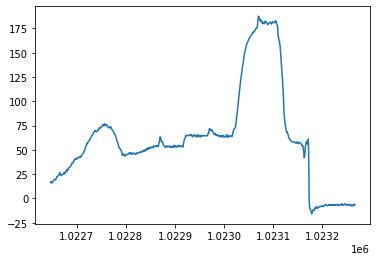

In [4]:
df_shot['\\WTOT_DLM03'].plot()

In [5]:
df_shot['\\WTOT_DLM03_dt'] = df_shot['\\WTOT_DLM03'].diff().fillna(method = "bfill").values / df_shot['time'].diff().fillna(method='bfill').values

<ipython-input-5-89399bb2cb0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['\\WTOT_DLM03_dt'] = df_shot['\\WTOT_DLM03'].diff().fillna(method = "bfill").values / df_shot['time'].diff().fillna(method='bfill').values


In [6]:
col_heat = ['\\EC1_PWR', '\\EC2_PWR','\\EC3_PWR','\\EC4_PWR','\\EC5_PWR','\\nb11_pnb','\\nb12_pnb','\\nb13_pnb']
df_shot['Pin'] = df_shot[col_heat].sum(axis = 1).values

<ipython-input-6-2ca49f2308b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['Pin'] = df_shot[col_heat].sum(axis = 1).values


In [7]:
df_shot['tau_e'] = df_shot['Pin'] / df_shot['\\WTOT_DLM03']

<ipython-input-7-c0b8c6eff9f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['tau_e'] = df_shot['Pin'] / df_shot['\\WTOT_DLM03']


In [8]:
df_shot['tau_e'] = df_shot['tau_e'].apply(lambda x : x if x > 0 else 0)

<ipython-input-8-e2f391a5f92f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['tau_e'] = df_shot['tau_e'].apply(lambda x : x if x > 0 else 0)


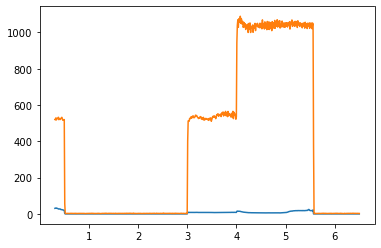

In [20]:
import matplotlib.pyplot as plt

plt.plot(df_shot.time, df_shot.tau_e)
plt.plot(df_shot.time, df_shot.Pin)

In [22]:
df_diag['\\dWdt'] = [0 for _ in range(len(df_diag))]

In [ ]:
df = df_diag
shot_list = df.shot.unique()

for shot in shot_list:
    
    indice = df[df.shot == shot].index.values
    
    dvl = df['\\WTOT_DLM03'].loc[indice].shift(1).fillna(method = 'bfill').values
    dvr = df['\\WTOT_DLM03'].loc[indice].shift(-1).fillna(method = 'ffill').values
    
    dtl = df.loc[indice].time.shift(1).fillna(method = 'bfill').values
    dtr = df.loc[indice].time.shift(-1).fillna(method = 'ffill').values
    
    dv = dvr - dvl
    dt = dtr - dtl
    
    df['\\dWdt'].loc[indice] = dv / dt

(5.1, 5.6)

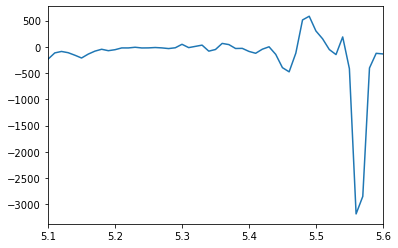

In [52]:
df_shot = df_diag[df_diag['shot'] == 31964]
plt.plot(df_shot.time, df_shot['\\dWdt'])
plt.xlim([5.1, 5.6])

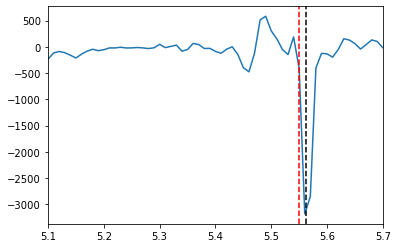

In [93]:
dvl = df_shot['\\WTOT_DLM03'].shift(1).fillna(method = 'bfill').values
dvr = df_shot['\\WTOT_DLM03'].shift(-1).fillna(method = 'ffill').values

dtl = df_shot.time.shift(1).fillna(method = 'bfill').values
dtr = df_shot.time.shift(-1).fillna(method = 'ffill').values
t = df_shot.time.values
dv = dvr - dvl
dt = dtr - dtl
plt.plot(t,dv/dt)
plt.xlim([5.1,5.7])
plt.axvline(x = t_tq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_cq, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

<ipython-input-101-0e34ab5e5568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['tau_e'] = df_shot[col_heat].sum(axis = 1) / df_shot['\\WTOT_DLM03']


(1.0, 5.5)

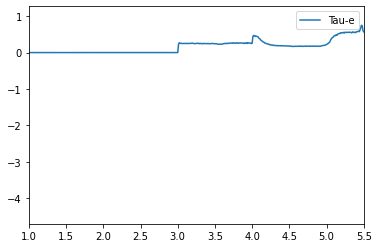

In [101]:
t_tq = df_disrupt[df_disrupt.shot == 31964].t_tmq.values
t_cq = df_disrupt[df_disrupt.shot == 31964].t_ip_min_fault.values
df_shot['tau_e'] = df_shot[col_heat].sum(axis = 1) / df_shot['\\WTOT_DLM03']
plt.plot(df_shot.time, df_shot['tau_e'] / df_shot['tau_e'].max(), label = 'Tau-e')
plt.axvline(x = t_tq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_cq, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
plt.legend()
plt.xlim([1.0,5.5])

(5.1, 5.7)

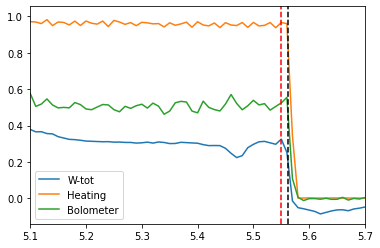

In [74]:
t_tq = df_disrupt[df_disrupt.shot == 31964].t_tmq.values
t_cq = df_disrupt[df_disrupt.shot == 31964].t_ip_min_fault.values
plt.plot(df_shot.time, df_shot['\\WTOT_DLM03'] / df_shot['\\WTOT_DLM03'].max(), label = 'W-tot')
plt.plot(df_shot.time, df_shot[col_heat].sum(axis = 1) / df_shot[col_heat].sum(axis = 1).max(), label = 'Heating')
plt.plot(df_shot.time, df_shot['\\ax3_bolo02:FOO'] / df_shot['\\ax3_bolo02:FOO'].max(), label = 'Bolometer')
plt.axvline(x = t_tq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_cq, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
plt.legend()
plt.xlim([5.1,5.7])

In [ ]:
df_efit.head()

In [ ]:
df_ece.describe()

In [ ]:
df_diag.describe()

In [ ]:
df_diag['\\RCPPU2B:FOO'].describe()

In [ ]:
df_diag[['\\LM01','\\LM02','\\LM03','\\LM04']].isna().sum().values

In [ ]:
df_diag[['\\BETAP_DLM03','\\DMF_DLM03','\\DLM01','\\DLM03','\\WTOT_DLM03']].isna().sum().values

In [ ]:
df_diag[['\\HCMIL01','\\HCMIL02','\\HCMIL03','\\HCMIL04','\\HCMIL05','\\HCMIL06','\\HCMIL07','\\HCMIL08','\\HCMIL09','\\HCMIL10',
            '\\HCMIL11','\\HCMIL12','\\HCMIL13','\\HCMIL14','\\HCMIL15','\\HCMIL16','\\HCMID01','\\HCMID02','\\HCMID03','\\HCMID04',
            '\\HCMID05','\\HCMID06','\\HCMID07','\\HCMID08','\\HCMCD01','\\HCMCD02','\\HCMCD03','\\HCMCD04','\\HCMCD05','\\HCMCD06',
            '\\HCMCD07','\\HCMCD08','\\HCMCD09','\\HCMCD10','\\HCMCD11','\\HCMCD12','\\HCMCD13','\\HCMCD14','\\HCMCD15','\\HCMCD16',
            '\\HCMOD01','\\HCMOD02','\\HCMOD03','\\HCMOD04','\\HCMOD05','\\HCMOD06','\\HCMOD07','\\HCMOD08']].isna().sum().values

In [ ]:
df_diag[['\\BETAP_DLM03','\\DMF_DLM03','\\DLM01','\\DLM03','\\WTOT_DLM03']].isna().sum().values

In [ ]:
df_diag[['\\LM01','\\LM02','\\LM03','\\LM04']].isna().sum().values

In [ ]:
df_diag[df_diag['\\HCMIL01'].isna()].shot.unique()

In [ ]:
df_diag[['\\ne_inter01','\\ne_tci01','\\ne_tci02','\\ne_tci03','\\ne_tci04','\\ne_tci05']].isna().sum().values

In [ ]:
df_diag[['\\LV01','\\LV12','\\LV23','\\LV34','\\LV45']].isna().sum().values

In [ ]:
df_diag[['\\RC01','\\RC02','\\RC03','\\VCM01','\\VCM02','\\VCM03','\\RCPPU1','\\RCPPL1']].isna().sum().values

In [ ]:
df_diag[['\\TOR_HA01','\\TOR_HA02','\\TOR_HA03','\\TOR_HA04','\\TOR_HA05','\\TOR_HA06','\\TOR_HA07','\\TOR_HA08',
        '\\TOR_HA09','\\TOR_HA10','\\TOR_HA11','\\TOR_HA12','\\TOR_HA13','\\TOR_HA14','\\TOR_HA15','\\TOR_HA16','\\TOR_HA17',
        '\\TOR_HA18','\\TOR_HA19','\\TOR_HA20','\\POL_HA01','\\POL_HA02','\\POL_HA03','\\POL_HA04','\\POL_HA05',
        '\\POL_HA06','\\POL_HA07','\\POL_HA08','\\POL_HA09','\\POL_HA10']].isna().sum().values

In [ ]:
df_diag[df_diag['\\TOR_HA13'].isna()].shot.unique()

In [ ]:
df_diag[['\\EC2_PWR','\\EC3_PWR', '\\EC4_PWR']].isna().sum().values

In [ ]:
df_diag[['\\nb11_pnb','\\nb12_pnb','\\nb13_pnb']].isna().sum().values

In [ ]:
df_diag[['\\ax3_bolo02:FOO']].isna().sum().values

In [ ]:
import numpy as np
df_diag[df_diag['\\ax3_bolo02:FOO'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\RCPPU2B:FOO'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\RCPPL1'].isna()].shot.unique()

In [ ]:
df_diag['\\RCPPL1'].describe()

In [ ]:
df_diag['\\RCPPU1'].describe()

In [ ]:
df_diag[df_diag['\\RCPPU1'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\RCPPL2B:FOO'].isna()].shot.unique()

In [ ]:
len(df_diag[df_diag['\\ne_inter01'].isna()].shot.unique())

In [ ]:
df_diag[df_diag.shot.isin(df_diag.shot.unique()[-100:])].shot.unique()

In [ ]:
df_diag[['\\ne_tci01','\\ne_tci02','\\ne_tci03','\\ne_tci04','\\ne_tci05']].isna().sum().values

In [ ]:
df_diag[df_diag['\\ne_tci01'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\ne_tci02'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\ne_tci03'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\ne_tci04'].isna()].shot.unique()

In [ ]:
df_diag[df_diag['\\ne_tci05'].isna()].shot.unique()

In [ ]:
df_diag.shot.unique()

In [ ]:
df_diag[['\\LV01','\\LV12','\\LV23','\\LV34','\\LV45']].isna().sum()

In [ ]:
df_diag[df_diag['\\LV45'].isna()].shot.unique()

In [ ]:
len(df_diag[df_diag['\\RCPPL2B:FOO'].isna()].shot.unique())

In [ ]:
len(df_diag[df_diag['\\EC4_PWR'].isna()].shot.unique())

In [ ]:
df_ece[['\\ECE08', '\\ECE13', '\\ECE18', '\\ECE24', '\\ECE26','\\ECE32', '\\ECE37', '\\ECE42', '\\ECE54', '\\ECE63', '\\ECE67', '\\ECE73']].isna().sum()

In [ ]:
df_ece[df_ece['\\ECE73'].isna()].shot.unique()

In [ ]:
import pandas as pd

df = pd.read_csv("./results/TCN_dist_4_Focal_Normal_Robust_TQ_seed_42_eval_detail.csv")

In [ ]:
df.head()

In [ ]:
df[(df.task == 'test') & (df.success == False)].sort_values(['shot', 'dist'])

In [ ]:
df[(df.task == 'test') & (df.success == False)].sort_values(['shot', 'dist'])[0:10]

In [ ]:
new_df = df[(df.task == 'test') & (df.success == False)].sort_values(['shot', 'dist'])
new_df.to_csv("./file.csv", index=False)

In [ ]:
df[(df.task == 'test') & (df.success == False)].shot.unique()

In [ ]:
n_total = len(df[(df.task == 'train')].shot.unique())
n_failure = len(df[(df.task == 'train') & (df.success == False)].shot.unique())

print("shot failed to predict disruption : {} / {}".format(n_failure, n_total))

In [ ]:
n_total = len(df[(df.task == 'test')].shot.unique())
n_failure = len(df[(df.task == 'test') & (df.success == False)].shot.unique())

print("shot failed to predict disruption : {} / {}".format(n_failure, n_total))

In [ ]:
df_efit= pd.read_csv("./dataset/Bayesian_Disruption_efit.csv")
df_ece=pd.read_csv("./dataset/Bayesian_Disruption_ece.csv")
df_diag=pd.read_csv("./dataset/Bayesian_Disruptionn_diag.csv")
df_ts=pd.read_csv("./dataset/Bayesian_Disruption_thomson.csv")

# Model performance comparison

In [ ]:
import matplotlib.pyplot as plt

df_shot = df_extend[df_extend.shot == 21310]
x = df_shot.time
y = df_shot['\\RC03']

t_tmq = df_disrupt[df_disrupt.shot == 21310]['t_tmq'].values
plt.plot(x,y)
plt.axvline(t_tmq, ymin = 0, ymax = 1, c = 'k')
plt.xlim([5, 6])

In [ ]:
df_disrupt.shot.unique()

In [ ]:
df.head()

In [ ]:
df_extend.head()

In [ ]:
df_disrupt.head()

In [ ]:
len(df_disrupt.shot.unique())

In [ ]:
len(df_extend.shot.unique())

In [ ]:
from src.config import Config
config = Config()

In [ ]:
import matplotlib.pyplot as plt

shot = 21747
t_flattop_start = df_disrupt[df_disrupt.shot == shot].t_flattop_start.values.item()
t_tmq_ECE = df_disrupt[df_disrupt.shot == shot].t_tmq_ECE.values.item()
t_tmq = df_disrupt[df_disrupt.shot == shot].t_tmq.values.item()
t_tmq_dmf = df_disrupt[df_disrupt.shot == shot].t_tmq_dmf.values.item()
t_ip_min_fault = df_disrupt[df_disrupt.shot == shot].t_ip_min_fault.values.item()

print("t_flattop : {:.3f} | t_tmq : {:.3f} | t_ip_min_fault : {:.3f}".format(t_flattop_start, t_tmq, t_ip_min_fault))

df_shot = df_extend[df_extend.shot == shot]

time_x = df_shot['time']
betap = df_shot['\\betap']

plt.plot(time_x, betap)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, label = "thermal quench")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, label = "current quench")
plt.legend()

In [ ]:
# Temperature profile fitting
t0 = time_x.iloc[-256]
t1 = time_x.iloc[-128]
t2 = time_x.iloc[-24]

print("t0 : {:.3f}".format(t0))
print("t1 : {:.3f}".format(t1))
print("t2 : {:.3f}".format(t2))

cols_te_core = config.TS_TE_CORE_COLS
cols_te_edge = config.TS_TE_EDGE_COLS

from typing import List
from scipy.interpolate import interp1d

CORE_RADIUS = [1.797, 1.818, 1.841, 1.862, 1.884, 1.908, 1.931, 1.954, 1.979, 2.004, 2.03, 2.056, 2.082, 2.108]
EDGE_RADIUS = [2.108, 2.120, 2.133, 2.146, 2.153, 2.171, 2.183, 2.190, 2.197, 2.203, 2.209, 2.216, 2.229, 2.243]

def get_point_profile(df_shot : pd.DataFrame, cols : List, t):
    tp = df_shot[df_shot.time == t][cols].values.reshape(-1,)
    return tp

import matplotlib.pyplot as plt
import numpy as np

te_core_t0 = get_point_profile(df_shot, cols_te_core, t0)
te_edge_t0 = get_point_profile(df_shot, cols_te_edge, t0)

te_core_t1 = get_point_profile(df_shot, cols_te_core, t1)
te_edge_t1 = get_point_profile(df_shot, cols_te_edge, t1)

te_core_t2 = get_point_profile(df_shot, cols_te_core, t2)
te_edge_t2 = get_point_profile(df_shot, cols_te_edge, t2)

def interpolate(radius, te, n_points : int):
    r_min = radius[0]
    r_max = radius[-1]
    
    r_new = np.linspace(r_min, r_max, n_points, endpoint=True)
    fn = interp1d(radius, te, kind = 'cubic')
    
    te_interpolate = fn(r_new)
    return r_new, te_interpolate
    
r_core, te_core_t0 = interpolate(CORE_RADIUS, te_core_t0, 128)
_, te_core_t1 = interpolate(CORE_RADIUS, te_core_t1, 128)
_, te_core_t2 = interpolate(CORE_RADIUS, te_core_t2, 128)

r_edge, te_edge_t0 = interpolate(EDGE_RADIUS, te_edge_t0, 128)
_, te_edge_t1 = interpolate(EDGE_RADIUS, te_edge_t1, 128)
_, te_edge_t2 = interpolate(EDGE_RADIUS, te_edge_t2, 128)

fig, ax = plt.subplots(1,1,figsize = (12,6))
ax.plot(r_core, te_core_t0, 'b-', label = 'Te-core : {:.3f}s'.format(t0))
ax.plot(r_edge, te_edge_t0, 'b--', label = 'Te-edge : {:.3f}s'.format(t0))

ax.plot(r_core, te_core_t1, 'k-', label = 'Te-core : {:.3f}s'.format(t1))
ax.plot(r_edge, te_edge_t1, 'k--', label = 'Te-edge : {:.3f}s'.format(t1))

ax.plot(r_core, te_core_t2, 'r-', label = 'Te-core : {:.3f}s'.format(t2))
ax.plot(r_edge, te_edge_t2, 'r--', label = 'Te-edge : {:.3f}s'.format(t2))

ax.axvline(0.5 * CORE_RADIUS[-1] + 0.5 * EDGE_RADIUS[0], ymin = 0, ymax = 1, c='k')
ax.set_xlabel("Radius[m]")
ax.set_ylabel("Tempeature[kev]")
ax.legend()

# r mid out
# TS -> ECE
# ne degradation
# TCI interferometer
# ne_inter01
# HL transition shot searching

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

def get_te_profile(df_shot : pd.DataFrame, t:float, n_points : int = 128):
    te_core = get_point_profile(df_shot, cols_te_core, t)
    te_edge = get_point_profile(df_shot, cols_te_edge, t)
    te = np.concatenate((te_core, te_edge[1:]))
    RADIUS = CORE_RADIUS + EDGE_RADIUS[1:]
    r, te = interpolate(RADIUS, te, n_points)
    te = np.clip(te, a_min = 0.1, a_max = np.inf)
    return r, te

z = []
for t in time_x:
    r, te = get_te_profile(df_shot, t, 128)
    z.append(te.reshape(-1,1))

z = np.concatenate(z, axis = 1)
x, y = np.meshgrid(time_x, r)

fig, ax = plt.subplots(figsize=(13, 4))
pcm = ax.pcolor(x,y,z, cmap='Reds', shading = 'auto', norm=colors.LogNorm(vmin=z.min(), vmax=z.max()))

fig.colorbar(pcm, ax=ax)
plt.show()

In [ ]:
plt.imshow(z[:,0:40])

In [ ]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
profiles = np.load("./dataset/profiles.npz")
te_profile = profiles['te']
plt.imshow(te_profile[0:128,:])

In [ ]:
# Magnetic loop signal
cols_lm = config.LM
time_x =  df_shot.time.values
lm01 = df_shot[cols_lm[0]].values
lm02 = df_shot[cols_lm[1]].values
lm03 = df_shot[cols_lm[2]].values
lm04 = df_shot[cols_lm[3]].values

t_tmq = df_disrupt[df_disrupt.shot == 21747].t_tmq.item()
t_ip = df_disrupt[df_disrupt.shot == 21747].t_ip_min_fault.item()

plt.plot(time_x, lm01, label = 'LM01')
plt.plot(time_x, lm02, label = 'LM02')
plt.plot(time_x, lm03, label = 'LM03')
plt.plot(time_x, lm04, label = 'LM04')
plt.axvline(t_tmq, ymin = 0, ymax = 1, c = 'k', label = 'tmq')
plt.axvline(t_ip, ymin = 0, ymax = 1, c = 'r', label = 'cq')
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("Lock Mode signal")
plt.xlim([9,12])
plt.show()

In [ ]:
freq_lm = np.fft.fftfreq(len(time_x))
lm01_f = abs(np.fft.fft(lm01) / len(lm01))
lm02_f = abs(np.fft.fft(lm02) / len(lm02))
lm03_f = abs(np.fft.fft(lm03) / len(lm03))
lm04_f = abs(np.fft.fft(lm04) / len(lm04))

plt.plot(freq_lm, lm01_f, label = 'fourier-lm01')
plt.plot(freq_lm, lm02_f, label = 'fourier-lm02')
plt.plot(freq_lm, lm03_f, label = 'fourier-lm03')
plt.plot(freq_lm, lm04_f, label = 'fourier-lm04')
plt.legend()

In [ ]:
plt.plot(time_x[0:64], lm01[0:64])

In [ ]:
from scipy import signal
t = time_x
lm01 = lm01[0:32]
lm02 = lm02[0:32]
lm03 = lm03[0:32]
lm04 = lm04[0:32]

f, t, Zxx = signal.stft(lm01, 1, nperseg = 16)
plt.pcolormesh(t,f,np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
f, t, Zxx = signal.stft(lm02, 1, nperseg = 16)
plt.pcolormesh(t,f,np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
f, t, Zxx = signal.stft(lm03, 1, nperseg = 16)
plt.pcolormesh(t,f,np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
f, t, Zxx = signal.stft(lm04, 1, nperseg = 16)
plt.pcolormesh(t,f,np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
time_x = df_extend[df_extend.shot == 21310].time
y = df_extend[df_extend.shot == 21310]['\\betap']

plt.plot(time_x, y, label = 'betap')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (28,4))
df.isnull().sum()[df.isnull().sum() > 0].plot(kind = 'bar')

In [ ]:
df.shot.unique()

In [ ]:
import numpy as np
from tqdm.auto import tqdm

shot_list = np.unique(df.shot)
null_shot_list = []
null_col_list = []

for shot in tqdm(shot_list):
    df_shot = df[df.shot == shot]
    total_len = len(df_shot)
    
    for col in null_cols:
        if df_shot[null_cols].isnull().sum()[col] > 0.5 * total_len:
            null_shot_list.append(shot)
            null_col_list.append(col)
            
summary = {
    "shot" : null_shot_list,
    "col" : null_col_list
}

summary = pd.DataFrame(summary)

In [ ]:
len(shot_list)

In [ ]:
summary.col.value_counts()

In [ ]:
summary.col.value_counts()[config.TS_TE_CORE_COLS ]

In [ ]:
summary.col.value_counts()[config.TS_NE_CORE_COLS]

In [ ]:
summary.col.value_counts()[config.TS_TE_EDGE_COLS ]

In [ ]:
summary.col.value_counts()[config.TS_NE_EDGE_COLS ]

In [ ]:
summary.col.value_counts()[config.LM ]

In [ ]:
summary.col.value_counts()[config.DL]

In [ ]:
summary.col.value_counts()[config.RC]

In [ ]:
summary.col.value_counts()[config.HCM]

In [ ]:
summary.col.value_counts()[config.TCI]

In [ ]:
summary.col.value_counts()[config.HA]

In [ ]:
ignore_col_list = []
for col in np.unique(summary.col):
    if summary.col.value_counts()[col] > 30:
        ignore_col_list.append(col)

In [ ]:
len(ignore_col_list)

In [ ]:
summary.shot.value_counts()

In [ ]:
ignore_shot_list = []
for shot in np.unique(summary.shot):
    if summary.shot.value_counts()[shot] > 30:
        ignore_shot_list.append(shot)

In [ ]:
len(ignore_shot_list)

In [ ]:
summary[summary.shot == 22971]

In [ ]:
summary[summary.shot == 22970]

In [ ]:
import numpy as np
from tqdm.auto import tqdm

shot_list = np.unique(df.shot)
shot_ignore = []
total_cols = config.DEFAULT_COLS + config.LM + config.HCM + config.DL + config.LV + config.RC + config.TCI + config.HA + config.TS
total_cols = [col for col in total_cols if col not in config.EXCEPT_COLS]
    
for shot in tqdm(shot_list, desc = 'remove the invalid values'):
    # dataframe per shot
    df_shot = df[df.shot==shot]
    
    # time length of the experiment is too short : at least larger than 2(s)
    if df_shot.time.iloc[-1] - df_shot.time.iloc[0] < 2.0:
        shot_ignore.append(shot)
        print("shot : {} - time length issue".format(shot))
        continue
    
    # 1st filter : null data ignore
    is_null = False
    for col in total_cols:
        if df_shot[total_cols].isnull().sum()[col] > 0.5 * len(df_shot):
            shot_ignore.append(shot)
            print("shot : {} - null data ignore".format(shot))
            is_null = True
            break
    
    if is_null:
        continue
    
    # 2nd filter : measurement error
    for col in config.DEFAULT_COLS:
        # null data
        if np.sum(df_shot[col] == 0) > 0.5 * len(df_shot):
            shot_ignore.append(shot)
            print("shot : {} - measurement issue".format(shot))
            break
        
        # constant value
        if df_shot[col].max() - df_shot[col].min() < 1e-3:
            shot_ignore.append(shot)
            print("shot : {} - invalid / constant value issue".format(shot))
            break

In [ ]:
df_shot = df[df.shot == 32565]
df_shot[total_cols].isnull().sum()

In [ ]:
for col in total_cols:
    if df_shot[total_cols].isnull().sum()[col] > 0.5 * len(df_shot):
        print(col) 

In [ ]:
import pandas as pd

df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_revised.csv")
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List_2022.csv', encoding = "euc-kr")

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

shot_list = df.shot.unique()
shot_list = [shot for shot in shot_list if shot in kstar_shot_list.shot.unique()]

disruption_data = None

for shot in shot_list:
    t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
    t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
    
    df_shot = df_extend[df_extend.shot==shot].copy()
    
    if len(df_shot) == 0:
        continue
    
    if df_shot.time.max() < t_tmq:
        continue
    
    df_shot['t_tmq'] = [t_tmq for _ in range(len(df_shot))]
    df_shot['t_ip_min_fault'] = [t_ip_min_fault for _ in range(len(df_shot))]
    
    if disruption_data is None:
        disruption_data = df_shot
    else:
        disruption_data = pd.concat((disruption_data, df_shot), axis = 0)
        
disruption_data['disruptive_tq'] = disruption_data['time'] >= disruption_data['t_tmq']
disruption_data['disruptive_cq'] = disruption_data['time'] >= disruption_data['t_ip_min_fault']

In [ ]:
disruption_data['disruptive_cq'] = disruption_data['time'] >= disruption_data['t_ip_min_fault'] - 0.05

In [ ]:
from src.config import Config
config = Config()
input_features = config.input_features

disruption_data[["shot", "time", "disruptive_tq", "disruptive_cq"] + input_features].head()

In [ ]:
test_shot = 21310
shot_list = np.unique(disruption_data.shot.values)
shot_list = np.array([shot for shot in shot_list if int(shot) != test_shot])

from sklearn.model_selection import train_test_split
shot_train, shot_test = train_test_split(shot_list, test_size = 0.2, random_state = 42)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

for shot in shot_train:
    df_train = pd.concat([df_train, disruption_data[disruption_data.shot == shot]], axis = 0)

for shot in shot_test:
    df_test = pd.concat([df_test, disruption_data[disruption_data.shot == shot]], axis = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

x_train, y_train = df_train[input_features].values, df_train['disruptive_cq'].values
x_test, y_test = df_test[input_features].values, df_test['disruptive_cq'].values

rfc = RandomForestClassifier(n_estimators=128, n_jobs = 32)
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [ ]:
print("f1 score for train : {:.3f}".format(f1_score(y_train, y_train_pred, average = 'macro')))
print("f1 score for test : {:.3f}".format(f1_score(y_test, y_test_pred, average = 'macro')))

In [ ]:
importance = rfc.feature_importances_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importance, index=input_features)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
df_shot = disruption_data[disruption_data.shot == 21310]

x_input = df_shot[input_features].values
probs = rfc.predict(x_input)

fig, ax = plt.subplots(1,1,figsize = (8,6))

time_x = df_shot.time.values
t_tq = df_shot.t_tmq.values[0]
t_ip = df_shot.t_ip_min_fault.values[0]

ax.plot(time_x, probs, label = 'probability')
ax.axvline(t_tq, ymin = 0, ymax = 1, c = 'r', label = 'thermal quench')
ax.axvline(t_ip, ymin = 0, ymax = 1, c = 'k', label = 'current quench')
ax.set_xlabel("time(s)")
ax.set_ylabel("prob")
ax.set_xlim([5.0, 6.0])
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

shot_list = df.shot.unique()
shot_list = [shot for shot in shot_list if shot in kstar_shot_list.shot.unique()]

disruption_data = None

for shot in shot_list:
    t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
    t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
    
    df_shot = df[df.shot==shot]
    
    if len(df_shot) == 0:
        continue
    
    if df_shot.time.max() < t_tmq:
        continue
    
    df_shot['t_tmq'] = [t_tmq for _ in range(len(df_shot))]
    df_shot['t_ip_min_fault'] = [t_ip_min_fault for _ in range(len(df_shot))]
    
    df_interval = df_shot[(df_shot.time >= t_tmq) & (df_shot.time <= t_ip_min_fault)]
    
    if disruption_data is None:
        disruption_data = df_interval
    else:
        disruption_data = pd.concat((disruption_data, df_interval), axis = 0)

In [ ]:
disruption_data = disruption_data.drop("Unnamed: 0", axis = 1)

In [ ]:
disruption_data.sort_values(by = ['shot', 'time'])

In [ ]:
disruption_data.to_csv("./dataset/KSTAR_Disruption_Shot_Info_2022.csv")

In [ ]:
import pandas as pd
disruption_data = pd.read_csv("./dataset/KSTAR_Disruption_Shot_Info_2022.csv")
disruption_data[disruption_data.shot == 21310]

In [ ]:
import numpy as np
import seaborn as sns

disruption_data['dt_tq_cq'] = disruption_data['t_ip_min_fault'] - disruption_data['t_tmq']

In [ ]:
temp = disruption_data.groupby(by = 'shot').mean() * 1000

import matplotlib.pyplot as plt
sns.histplot(data = temp, x = 'dt_tq_cq')
plt.xlabel('time(unit:ms)')

In [ ]:
temp['dt_tq_cq'].describe()

In [ ]:
import matplotlib.pyplot as plt
temp = df[(df.shot == 21310) & (df.time >= 5.10)]
plt.plot(temp.time, temp['\\aminor'])

In [ ]:
temp = df_extend[(df_extend.shot == 21310) & (df_extend.time >= 5.10)]
plt.plot(temp.time, temp['\\aminor'])

In [ ]:
cols = [
     'shot',
     '\\q95','\\ipmhd','\\kappa','\\tritop','\\tribot','\\betap','\\betan',
     '\\li','\\bcentr','\\rsurf','\\aminor','\\LM01','\\LM02','\\LM03','\\LM04',
     '\\DLM03','\\WTOT_DLM03','\\LV01','\\LV12','\\LV23','\\LV34','\\LV45','\\RC03','\\VCM03','\\ne_inter01'
]

cols = [
     'shot',
     '\\q95', '\\ipmhd', '\\kappa', '\\tritop', '\\tribot',
     '\\betap','\\li', '\\WTOT_DLM03', '\\ne_inter01',
     '\\DLM03', '\\RC03', '\\VCM03'
]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

train_data = disruption_data[cols]
train_data = train_data.dropna(axis = 0)
train_data = train_data.drop('shot', axis = 1)
model = KMeans(n_clusters = 4, max_iter=1024)
labels = model.fit_predict(train_data.values)

In [ ]:
train_data

In [ ]:
np.unique(labels)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# compressed_data = PCA(n_components=2).fit_transform(train_data.values)
embedding_model = TSNE(n_components=2)
compressed_data = embedding_model.fit_transform(train_data.values)
x1, x2 = compressed_data[:,0], compressed_data[:,1]

fig, ax = plt.subplots(1,1, figsize = (8,6))

clusters = np.unique(labels)

for cluster in clusters:
    indices = np.where(labels == cluster)
    ax.scatter(x1[indices],x2[indices], label = "Group-{}".format(cluster))

plt.legend()
fig.tight_layout()
plt.show()

In [ ]:
# what happen to group 3?
indices = np.where(labels == 2)
disruption_data.iloc[indices]

In [ ]:
normal_data = df[(df.shot == 21633) & (df.time < 5.07)][cols]
normal_data = normal_data.dropna(axis = 0)
normal_data = normal_data.drop('shot', axis = 1)

total_data = np.concatenate((train_data.values, normal_data.values), axis = 0)

compressed_data = embedding_model.fit_transform(total_data)
labels = np.concatenate((labels, np.array([4 for _ in range(len(normal_data))])))

x1, x2 = compressed_data[:,0], compressed_data[:,1]

fig, ax = plt.subplots(1,1, figsize = (8,6))

clusters = np.unique(labels)

for cluster in clusters:
    indices = np.where(labels == cluster)
    ax.scatter(x1[indices],x2[indices], label = "Group-{}".format(cluster))

plt.legend()
fig.tight_layout()
plt.show()

In [ ]:
# what happen to group 1?
indices = np.where(labels == 1)
disruption_data.iloc[indices]

In [ ]:
disruption_data[disruption_data.shot == 29055]

In [ ]:
shot = 29055
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\LM01'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

In [ ]:
shot = 29055
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\LM04'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

In [ ]:
shot = 21392
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\LM04'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

In [ ]:
shot = 21310
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\LM04'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

In [ ]:
shot = 29055
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\POL_HA10'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal) 
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

In [ ]:
shot = 29062
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\POL_HA10'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

In [ ]:
shot = 21392
time_x = df[df.shot == shot].time
signal = df[df.shot == shot]['\\POL_HA10'].values

t_tmq = kstar_shot_list[kstar_shot_list.shot == shot].t_tmq.values[0]
t_ip_min_fault = kstar_shot_list[kstar_shot_list.shot == shot].t_ip_min_fault.values[0]
plt.plot(time_x, signal)
plt.axvline(x = t_tmq, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
plt.axvline(x = t_ip_min_fault, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")